In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Info: 

- video size= 384x288 -- found in config.yaml?

In [2]:
data = pd.read_hdf('./3CT 03122019_Cage1_0007DLC_resnet50_testFeb4shuffle1_550000.h5')

In [3]:
dlc = data.DLC_resnet50_testFeb4shuffle1_550000

In [4]:
points = np.unique(dlc.columns.get_level_values('bodyparts'))

In [5]:
cmap = plt.get_cmap('viridis')

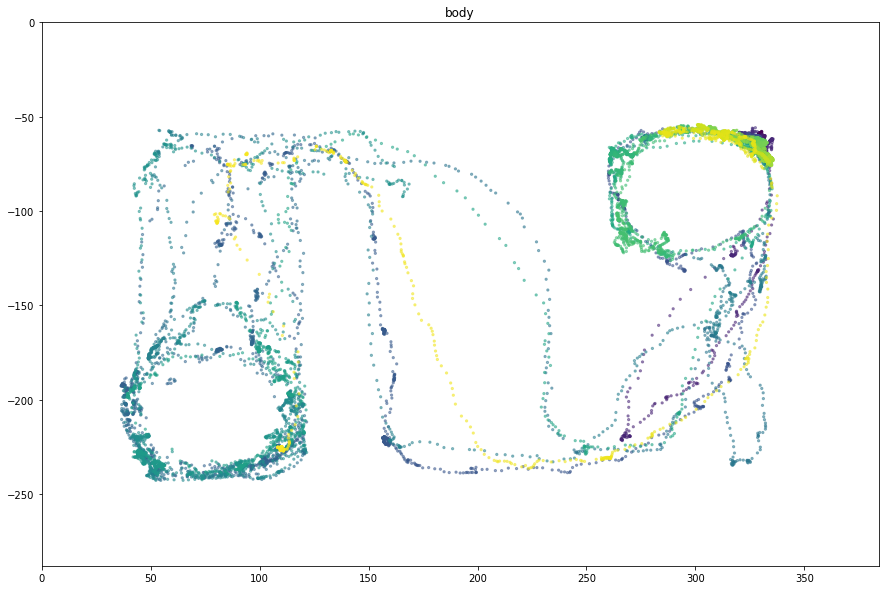

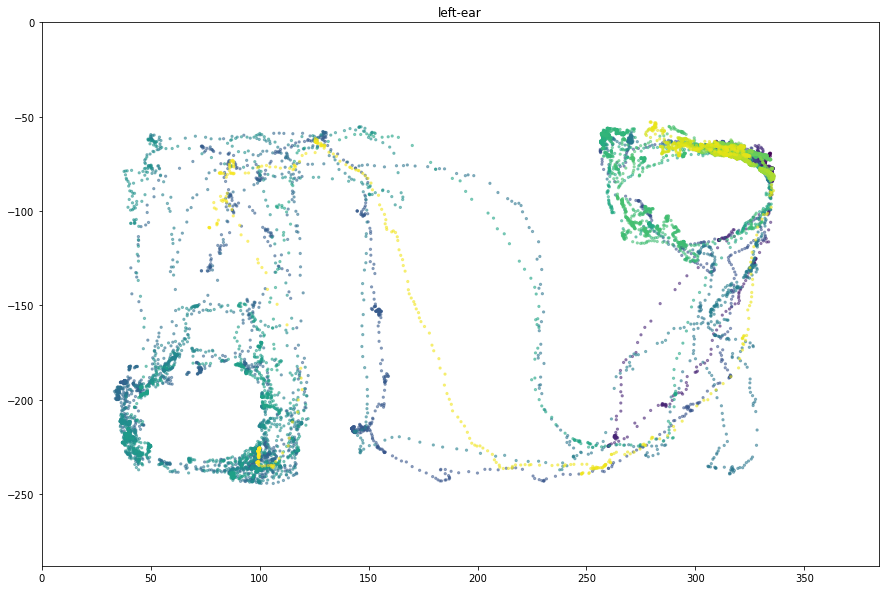

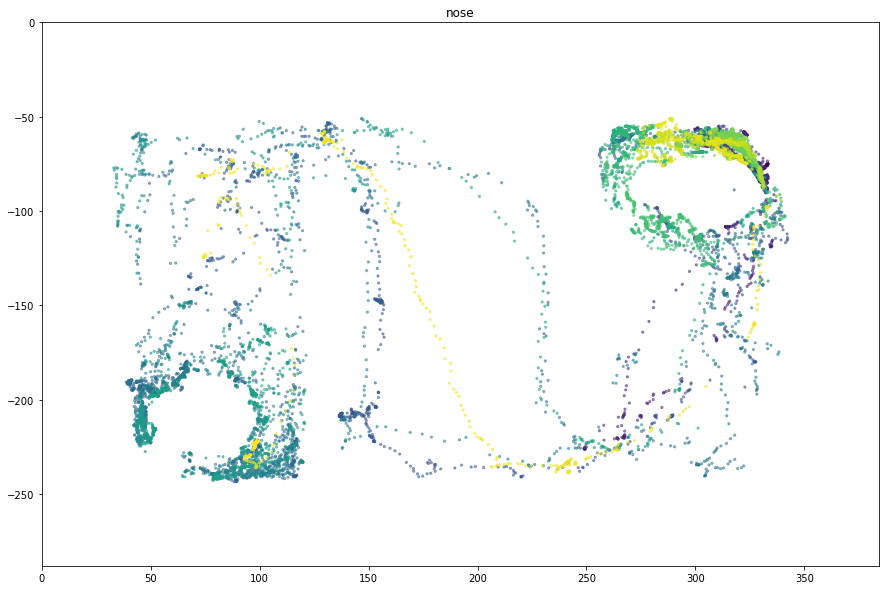

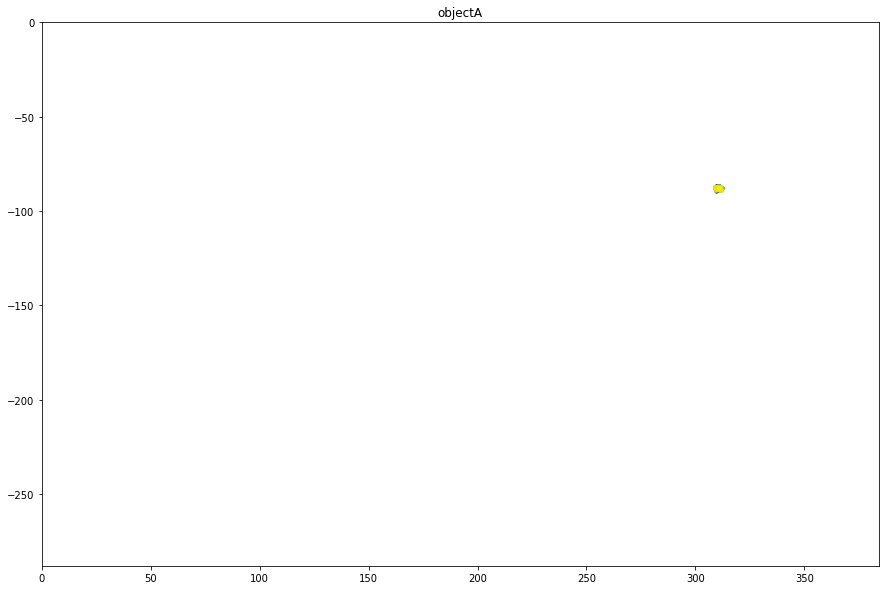

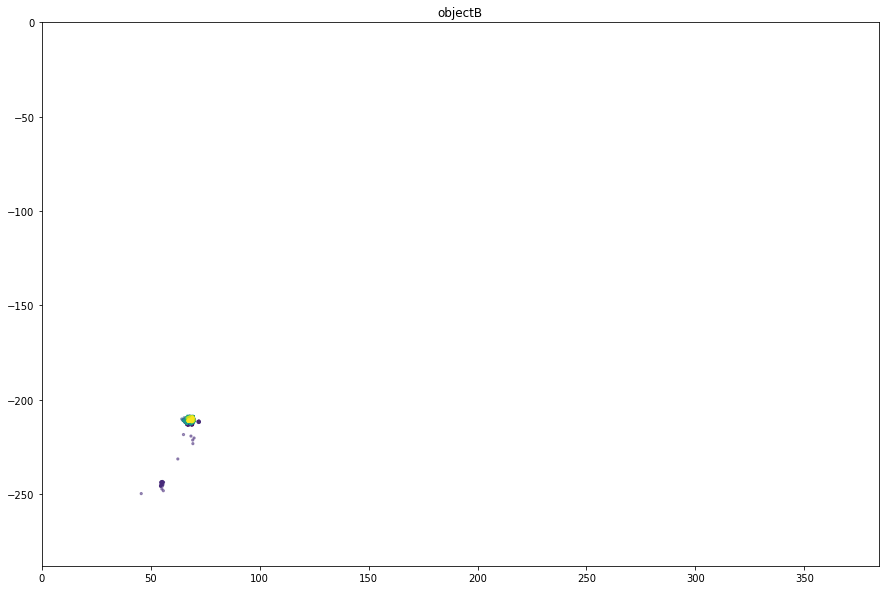

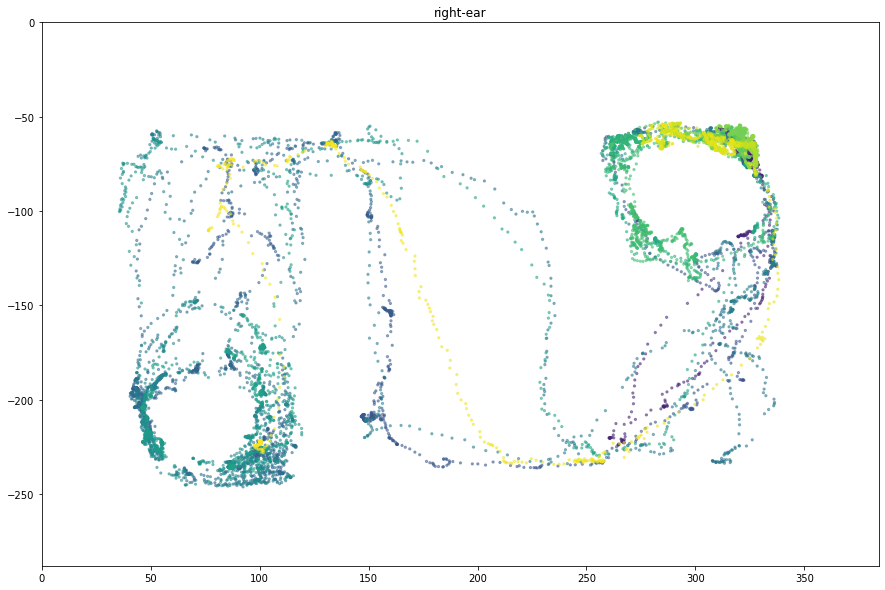

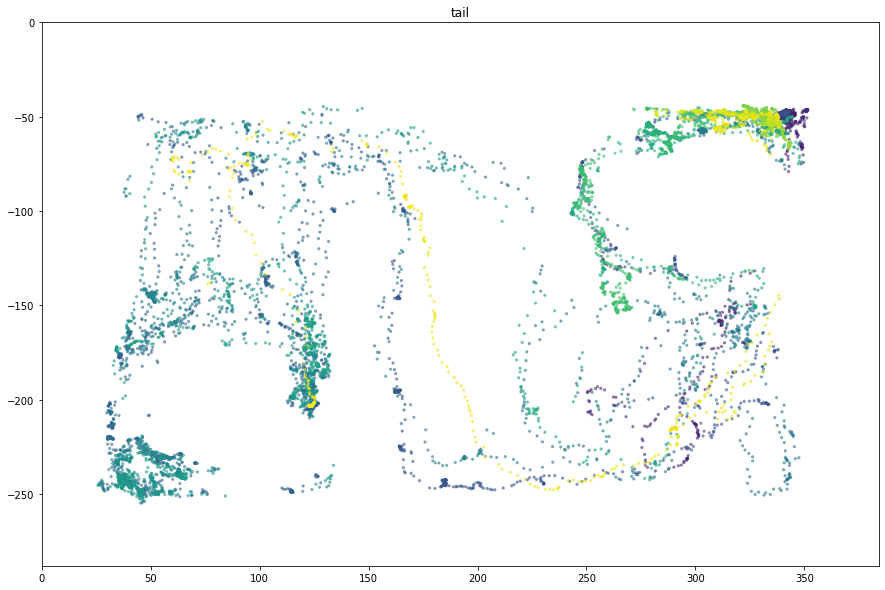

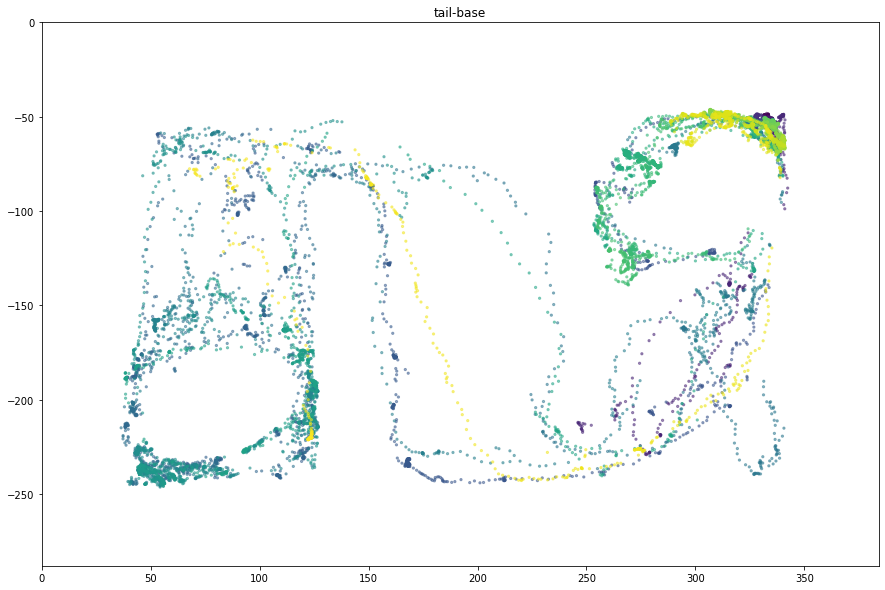

In [6]:
for p in points:
    
    plt.figure(figsize=(15,10))
    plt.scatter(dlc[p, 'x'], 1-dlc[p, 'y'], color=[cmap(i/15000) for i in np.arange(15000)], s=5, alpha=.5)
    plt.title(p)
    
    plt.xlim(0,384)
    plt.ylim(-288,0)

In [7]:
for i in dlc.index: 
    
    x_obja = dlc.loc[i, ("objectA", 'x')]
    y_obja = dlc.loc[i, ("objectA", 'y')]
    
    x_body = dlc.loc[i, ('body', 'x')]
    

In [17]:
dlc['distance', 'body-a'] = np.sqrt((dlc["objectA", "x"] - dlc["body", "x"])**2 +(dlc["objectA", "y"] - dlc["body", "y"])**2)
dlc['distance', 'body-b'] = np.sqrt((dlc["objectB", "x"] - dlc["body", "x"])**2 +(dlc["objectB", "y"] - dlc["body", "y"])**2)

dlc['distance', 'nose-a'] = np.sqrt((dlc["objectA", "x"] - dlc["nose", "x"])**2 +(dlc["objectA", "y"] - dlc["nose", "y"])**2)
dlc['distance', 'nose-b'] = np.sqrt((dlc["objectB", "x"] - dlc["nose", "x"])**2 +(dlc["objectB", "y"] - dlc["nose", "y"])**2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

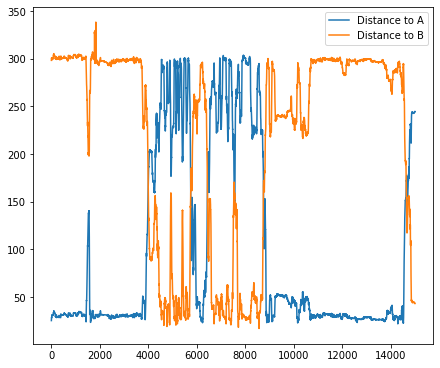

In [24]:
plt.figure(figsize=(6,5), constrained_layout=True)

plt.plot(np.arange(dlc.shape[0]), dlc['distance', 'body-a'], label='Distance to A')
plt.plot(np.arange(dlc.shape[0]), dlc['distance', 'body-b'], label='Distance to B')
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('./distance.png', dpi=300)
plt.show()

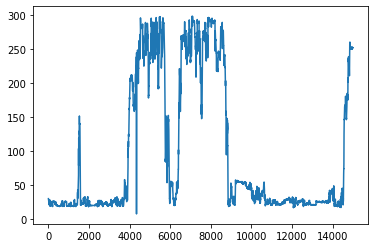

In [10]:
plt.plot(np.arange(dlc.shape[0]), dlc['distance', 'nose-a'])
#plt.plot(np.arange(dlc.shape[0]), dlc['distance', 'nose-b'])